In [1]:
import pandas as pd

medical = pd.read_csv("/Users/akhil/Projects/insurance/insurance.csv")
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(medical, test_size=0.2, random_state=42)

In [5]:
test_set.head()

,age,sex,bmi,children,smoker,region,charges
764,45,female,25.175,2,no,northeast,9095.06825
887,36,female,30.020,0,no,northwest,5272.17580
890,64,female,26.885,0,yes,northwest,29330.98315
1293,46,male,25.745,3,no,northwest,9301.89355
259,19,male,31.920,0,yes,northwest,33750.29180


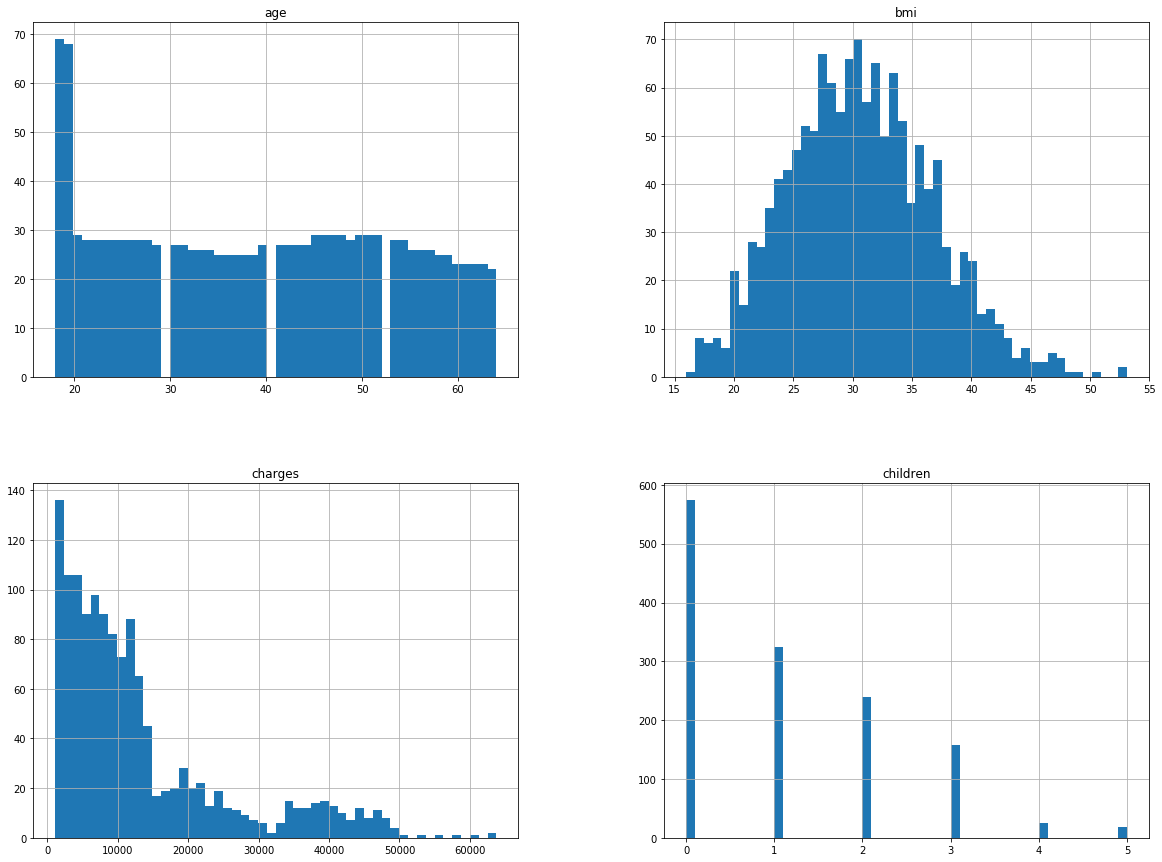

In [10]:
import matplotlib.pyplot as plt
medical.hist(bins=50, figsize=(20,15))
plt.show()

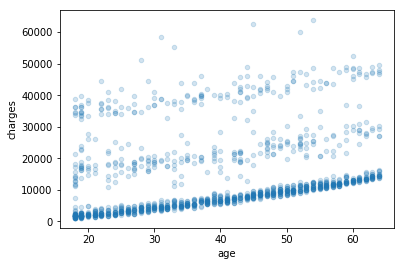

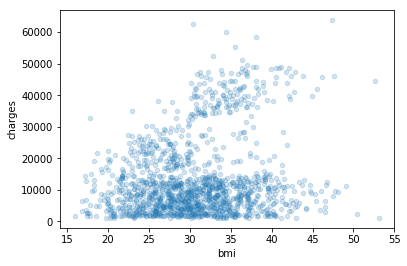

In [30]:
medical.plot(kind="scatter", x="age", y="charges", alpha=0.2)
medical.plot(kind="scatter", x="bmi", y="charges", alpha=0.2)

In [20]:
corr_matrix = medical.corr()

In [21]:
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

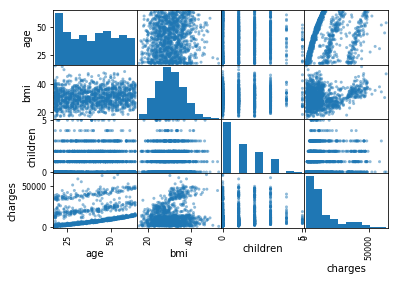

In [29]:
scatter_matrix = pd.plotting.scatter_matrix(medical)

In [32]:
sample_incomplete_rows = medical[medical.isnull().any(axis=1)].head()
sample_incomplete_rows

,age,sex,bmi,children,smoker,region,charges


In [33]:
medical["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [36]:
medical_cat = medical[["region"]]
medical_cat.head(10)

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
5,southeast
6,southeast
7,northwest
8,northeast
9,northwest


In [37]:
medical["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [38]:
medical["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [40]:
medical[["sex"]].head(10)

,sex
0,female
1,male
2,male
3,male
4,male
5,female
6,female
7,female
8,male
9,female


In [41]:
medical[["smoker"]].head(10)

,smoker
0,yes
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
medical_cat_1hot = cat_encoder.fit_transform(medical_cat)
medical_cat_1hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [45]:
cat_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [55]:
from sklearn.pipeline import Pipeline
cat_attribs = ["sex", "smoker", "region"]
cat_pipeline = Pipeline([
    ("cat", OneHotEncoder()),
])

In [77]:
from sklearn.preprocessing import StandardScaler
medical_num = medical.drop(cat_attribs+["charges"], axis=1)
num_attribs = list(medical_num)
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
medical_num_tr = num_pipeline.fit_transform(medical_num)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


['age', 'bmi', 'children']

In [65]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
medical_prepared = full_pipeline.fit_transform(medical)
medical_prepared

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [81]:
medical_charges = medical.drop(num_attribs+cat_attribs, axis=1)
medical_labels = num_pipeline.fit_transform(medical_charges, ["charges"])

In [82]:
lin_reg.fit(medical_prepared, medical_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)